# Домашнее задание 2. Нейронные сети
## Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td style="background-color: red">4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация библиотек

In [32]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from torch import FloatTensor
from torch.nn import Module

from torch import allclose
from torch import from_numpy

from math import sqrt                       # torch.sqrt causes errors
from torch.nn.functional import mse_loss    # torch.nn.MSELoss causes errors

from torch.nn import Sequential
from torch.nn import Linear

from torch.nn import Sigmoid
from torch.nn import Tanh
from torch.nn import ReLU
from torch.nn import ELU

from torch.optim import SGD
from torch.optim import RMSprop
from torch.optim import Adam

from torch.nn import BatchNorm1d
from torch.nn import Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# 1. Искусственная неронная сеть для решения задачи регрессии (9 баллов)

## 1.1 Загрузите данные, поделить на train и test



In [33]:
insurances = pd.read_csv('./data/insurance.csv', sep=',')
insurances = pd.get_dummies(insurances)


In [34]:

Y = insurances.charges
X = insurances.drop(columns='charges')

X_scaled = StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(X)
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)


In [35]:
X_d_train, X_d_test, Y_d_train, Y_d_test = train_test_split(X, Y, test_size=0.2, random_state=69)

print(X_d_train.head(), end='\n\n')
print(Y_d_train.head())

           age       bmi  children  sex_female  sex_male  smoker_no  \
55    1.338082  1.032103  0.751079   -0.989591  0.989591  -1.970587   
1334 -1.509965  0.206139 -0.908614    1.010519 -1.010519   0.507463   
852   0.483668  0.798339 -0.908614    1.010519 -1.010519  -1.970587   
738  -1.153959  0.174970  1.580926   -0.989591  0.989591  -1.970587   
1132  1.266881  1.577551 -0.908614   -0.989591  0.989591   0.507463   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
55      1.970587         -0.565267          1.765481         -0.611324   
1334   -0.507463          1.769076         -0.566418         -0.611324   
852     1.970587          1.769076         -0.566418         -0.611324   
738     1.970587          1.769076         -0.566418         -0.611324   
1132   -0.507463          1.769076         -0.566418         -0.611324   

      region_southwest  
55           -0.566418  
1334         -0.566418  
852          -0.566418  
738          -0.566418  
113

## 1.2 По необходимости проведите преодбработку/нормализацию данных

In [36]:
X_train = FloatTensor(X_d_train.values)
X_test  = FloatTensor(X_d_test.values )
Y_train = FloatTensor(Y_d_train.values)
Y_test  = FloatTensor(Y_d_test.values )

## 1.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=линейная регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое функцию активации можно не использовать.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [37]:
__epsilon__ = 0.00001

In [38]:
class BoomBoomModel(Module):
    def __init__(self, X, y, a_amount, l_amount, f_activ=ReLU, optim=Adam, lr=0.3, momentum=None):
        super(BoomBoomModel, self).__init__()
        self.X = X
        self.y = y
        self.attrs = a_amount
        self.amount = l_amount
        self.activ = f_activ

        self.batch = None
        self.dropout = None

        self.genLayers()
        self.optim = optim(self.conv.parameters(), lr=lr)
        if momentum:
            self.optim = optim(self.conv.parameters(), lr=lr, momentum=momentum)

    def genLayers(self):
        self.conv = Sequential()
        for i in range(self.amount):
            if i == self.amount - 1:
                self.conv.add_module(f'lin_{i+1}', Linear(self.attrs, 1))
                continue
            self.conv.add_module(f'lin_{i+1}', Linear(self.attrs, self.attrs))
            self.addNormalization(i)
            self.conv.add_module(f'act_{i+1}', self.activ())

    def addNormalization(self, i):
        if self.batch is not None:
            self.conv.add_module(f'Bth_{i+1}', BatchNorm1d(self.attrs))
        if self.dropout is not None:
            self.conv.add_module(f'Drp_{i+1}', Dropout(p=self.dropout))

    def addBatchNorm(self):
        self.batch = True

    def addDropout(self, a):
        self.dropout = a

    def net(self,  X=None):
        if X is None:
            X = self.X
        return self.conv.forward(X)[:,0]

    def loss(self, pred, y=None):
        if y is None:
            y = self.y
        return mse_loss(pred, y)

    def train(self, epochs=1000):
        losses = []
        accuracies = []
        for _ in range(epochs):
            self.optim.zero_grad()
            self.conv.train()

            pred = self.net()

            loss = self.loss(pred)
            loss.backward()

            self.optim.step()
            
            losses.append(sqrt(loss.item()))

            accuracy = (pred == self.y).float().sum()
            accuracies.append(accuracy * 100 / pred.shape[0])

            plt.yscale('log')

        plt.plot(losses)
        plt.show()
        plt.plot(accuracies)
        plt.show()

        return accuracies
    
    def test(self, X, y):
        pred = self.net(X)
        loss = self.loss(pred, y)
        ls = sqrt(loss.item())
        print(f'Loss: {ls}')
        return ls

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=1, bias=True)
  )
)


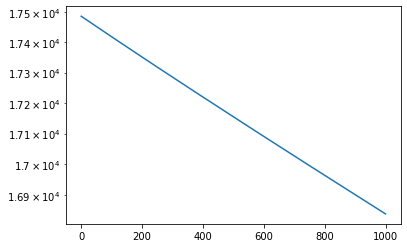

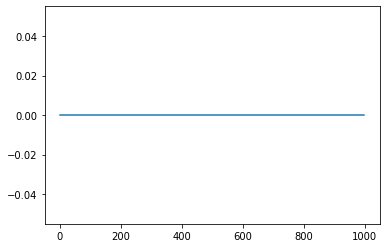

Loss: 19041.741937123294
--------------------------------------------------
BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=1, bias=True)
  )
)


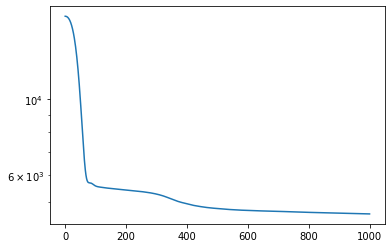

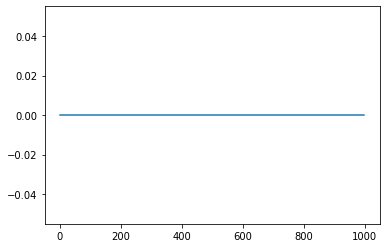

Loss: 5717.67032977593
--------------------------------------------------
BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=1, bias=True)
  )
)


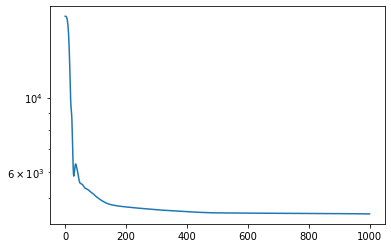

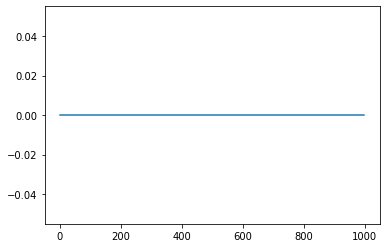

Loss: 5714.671469122262
--------------------------------------------------
BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (act_3): ReLU()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


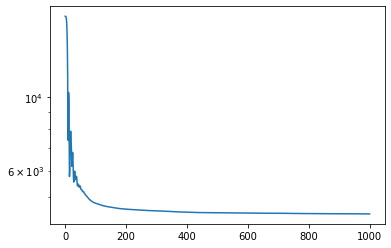

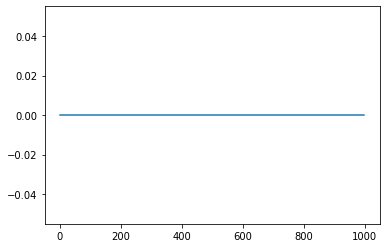

Loss: 5819.9422677548955
--------------------------------------------------


In [54]:
for i in range(4):
    model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), i+1, f_activ=ReLU)
    print(model)
    model.train()
    model.test(X_test, Y_test)
    print('-'*50)

## 1.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации: sigmoid, tanh, ReLU, ELU. 

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (act_1): Sigmoid()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (act_2): Sigmoid()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (act_3): Sigmoid()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


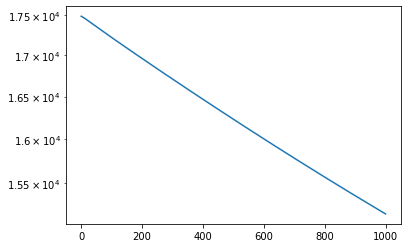

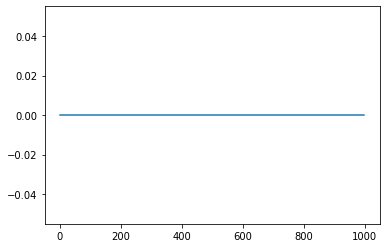

Loss: 17363.219056384678


17363.219056384678

In [40]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4, Sigmoid)
print(model)
model.train()
model.test(X_test, Y_test)

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (act_1): Tanh()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (act_2): Tanh()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (act_3): Tanh()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


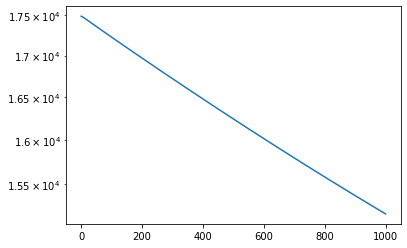

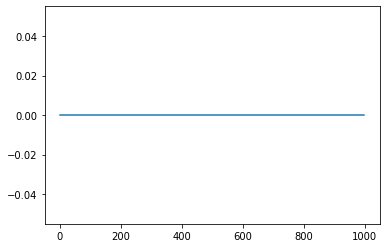

Loss: 17371.98296107845


17371.98296107845

In [41]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4, Tanh)
print(model)
model.train()
model.test(X_test, Y_test)

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (act_3): ReLU()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


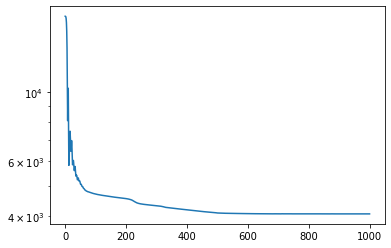

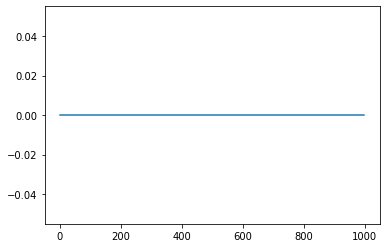

Loss: 5427.161689133649


5427.161689133649

In [42]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4, ReLU)
print(model)
model.train()
model.test(X_test, Y_test)

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (act_1): ELU(alpha=1.0)
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (act_2): ELU(alpha=1.0)
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (act_3): ELU(alpha=1.0)
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


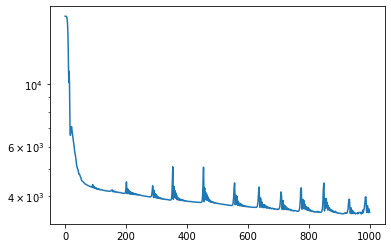

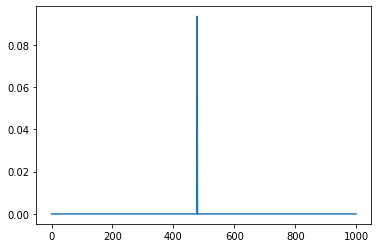

Loss: 5903.957655674709


5903.957655674709

In [43]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4, ELU)
print(model)
model.train()
model.test(X_test, Y_test)

## 1.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (act_3): ReLU()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


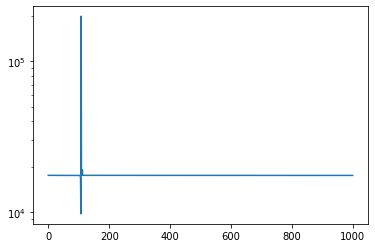

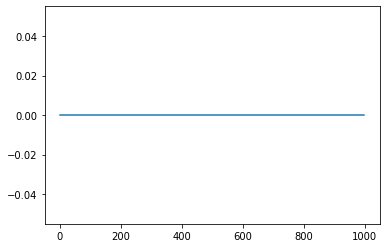

Loss: 19724.900810903968


19724.900810903968

In [55]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4, ReLU, SGD, lr=0.000001)
print(model)
model.train()
model.test(X_test, Y_test)

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (act_3): ReLU()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


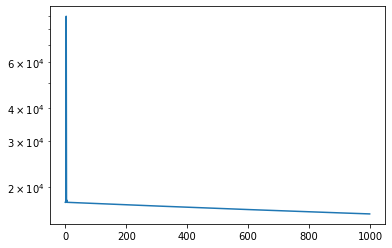

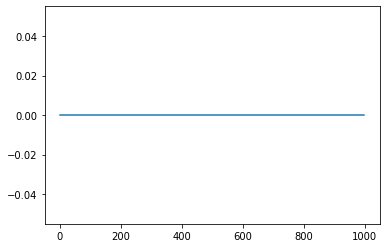

Loss: 18014.59497185546


18014.59497185546

In [45]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4, ReLU, SGD, lr=0.0001, momentum=0.04)
print(model)
model.train()
model.test(X_test, Y_test)

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (act_3): ReLU()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


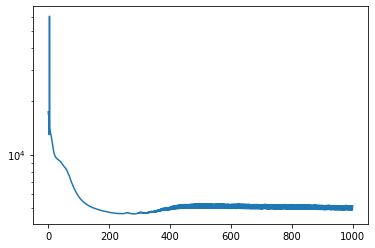

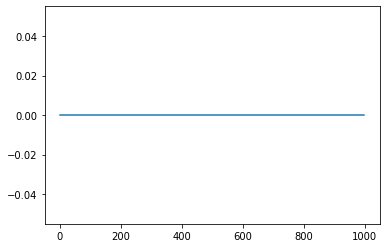

Loss: 6069.301442505554


6069.301442505554

In [46]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4, ReLU, RMSprop)
print(model)
model.train()
model.test(X_test, Y_test)

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (act_3): ReLU()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


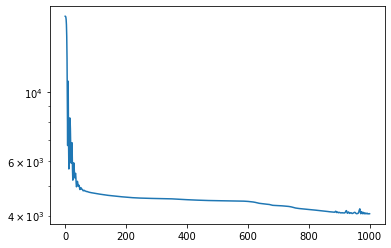

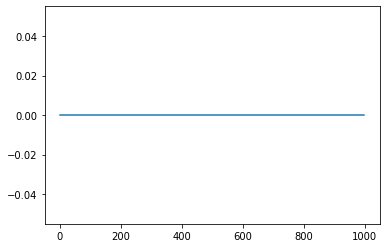

Loss: 5511.628978804723


5511.628978804723

In [47]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4, ReLU, Adam)
print(model)
model.train()
model.test(X_test, Y_test)

## 1.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (Bth_1): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (Bth_2): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (Bth_3): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_3): ReLU()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


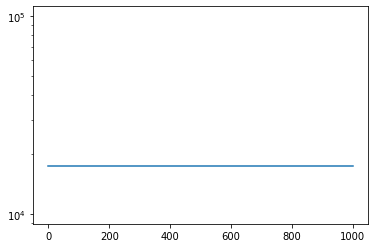

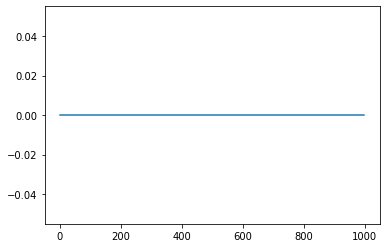

Loss: 19744.033225255676


19744.033225255676

In [48]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4)
model.addBatchNorm()
model.genLayers()
print(model)
model.train()
model.test(X_test, Y_test)

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (Drp_1): Dropout(p=0.2, inplace=False)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (Drp_2): Dropout(p=0.2, inplace=False)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (Drp_3): Dropout(p=0.2, inplace=False)
    (act_3): ReLU()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


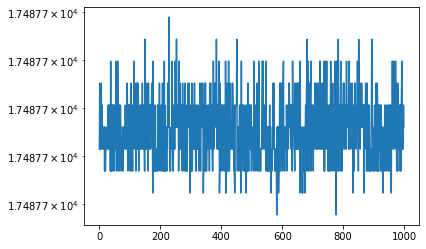

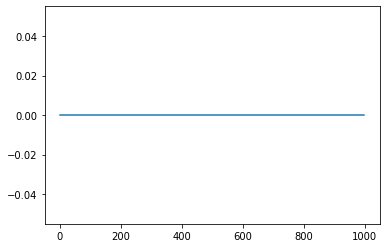

Loss: 19743.94813607451


19743.94813607451

In [49]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4)
model.addDropout(0.2)
model.genLayers()
print(model)
model.train()
model.test(X_test, Y_test)

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (Drp_1): Dropout(p=0.5, inplace=False)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (Drp_2): Dropout(p=0.5, inplace=False)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (Drp_3): Dropout(p=0.5, inplace=False)
    (act_3): ReLU()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


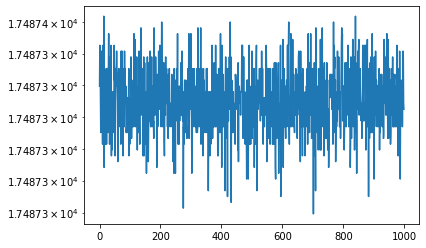

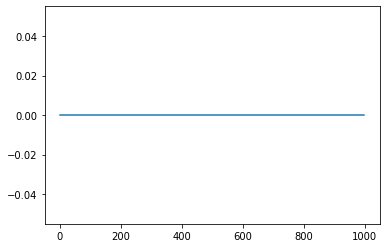

Loss: 19743.583464001666


19743.583464001666

In [50]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4)
model.addDropout(0.5)
model.genLayers()
print(model)
model.train()
model.test(X_test, Y_test)

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (Bth_1): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (Drp_1): Dropout(p=0.2, inplace=False)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (Bth_2): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (Drp_2): Dropout(p=0.2, inplace=False)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (Bth_3): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (Drp_3): Dropout(p=0.2, inplace=False)
    (act_3): ReLU()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


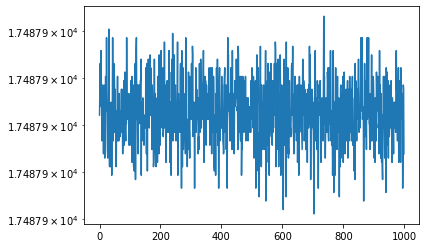

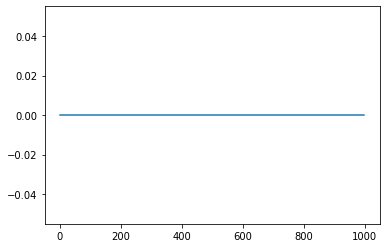

Loss: 19744.16450498729


19744.16450498729

In [51]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4, lr=0.01)
model.addBatchNorm()
model.addDropout(0.2)
model.genLayers()
print(model)
model.train()
model.test(X_test, Y_test)

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (Bth_1): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (Drp_1): Dropout(p=0.5, inplace=False)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (Bth_2): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (Drp_2): Dropout(p=0.5, inplace=False)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (Bth_3): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (Drp_3): Dropout(p=0.5, inplace=False)
    (act_3): ReLU()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


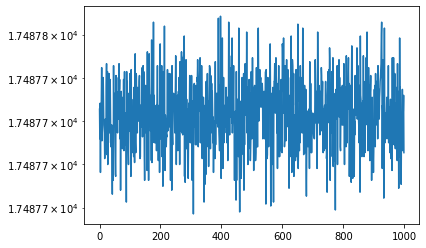

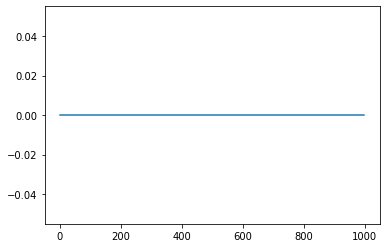

Loss: 19743.970826558674


19743.970826558674

In [52]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4)
model.addBatchNorm()
model.addDropout(0.5)
model.genLayers()
print(model)
model.train()
model.test(X_test, Y_test)

## 1.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

BoomBoomModel(
  (conv): Sequential(
    (lin_1): Linear(in_features=11, out_features=11, bias=True)
    (act_1): ReLU()
    (lin_2): Linear(in_features=11, out_features=11, bias=True)
    (act_2): ReLU()
    (lin_3): Linear(in_features=11, out_features=11, bias=True)
    (act_3): ReLU()
    (lin_4): Linear(in_features=11, out_features=1, bias=True)
  )
)


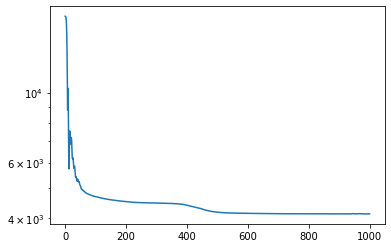

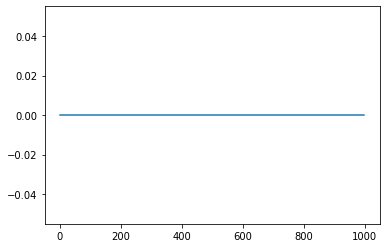

Loss: 5631.140204257038


5631.140204257038

In [62]:
model = BoomBoomModel(X_train, Y_train, len(X_d_train.columns), 4, ReLU)
print(model)
model.train()
model.test(X_test, Y_test)

## 1.8 Выводы

*Прекрасная жизнь начинается с ваших прекрасных мыслей:*

- Dropout и Batch нормирования не хотят работать :c
- Сигмоида и Танх не очень хороши в качестве функции активации в моем примере
- СГД оптимизиатор, возможно, где-то ловит колизион. Не смог понять что не так
- 1 линейного слоя мало
- Иногда модель с меньшим кол-вом слоев показывает результат лучше, чем с большим
- Loss варьируется в порядке 10% между тестированиями  

# 2. Искусственная неронная сеть для решения задачи классификации (9 баллов)

## 2.1 Загрузите данные, поделить на train и test



In [ ]:
BL = 0.86

In [75]:
orig_comments = pd.read_csv('./data/train.csv', sep=',')
comments = orig_comments.copy(deep=True)

if comments.id.is_unique:
    comments = comments.drop(columns='id') 

comments.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
# Y = insurances.charges
# X = insurances.drop(columns='charges')

# X_scaled = StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(X)
# X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)


In [ ]:
# X_d_train, X_d_test, Y_d_train, Y_d_test = train_test_split(X, Y, test_size=0.2, random_state=69)

# print(X_d_train.head(), end='\n\n')
# print(Y_d_train.head())


In [ ]:
# X_train = FloatTensor(X_d_train.values)
# X_test  = FloatTensor(X_d_test.values )
# Y_train = FloatTensor(Y_d_train.values)
# Y_test  = FloatTensor(Y_d_test.values )


## 2.2 По необходимости проведите преодбработку/нормализацию данных

In [76]:
import re
import string


def clean_text(text):
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\r", "", text)
    text = re.sub(r"\n", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub("(\\W)", " ", text)
    text = re.sub('\S*\d\S*\s*', '', text)

    return text


comments['comment_text'] = comments['comment_text'].apply(lambda x: clean_text(x))
comments.head()


NameError: name 'trains' is not defined

## 2.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=логистическая регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

## 2.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации на промежуточных слоях: sigmoid, tanh, ReLU, ELU. На выходном слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

## 2.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

## 2.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

## 2.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

## 2.8 Выводы

*Your beautiful thoughts:*